# 1C

In [91]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from math import ceil
import matplotlib.cm as cm
from mpl_toolkits import mplot3d

In [92]:
data = pd.read_csv("fods_1.csv").to_numpy()
X1 = data[:, :1]
X2 = data[:, 1:2]
Y = data[:, 2]


In [93]:
def error_function(Y, X, W):
    return 

In [94]:
delta = 0.025
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
_X, _Y = np.meshgrid(x, y)
Z1 = np.exp(-_X**2 - _Y**2)
Z2 = np.exp(-(_X - 1)**2 - (_Y - 1)**2)
Z = (Z1 - Z2) * 2

C:\Users\Sriram\AppData\Local\Temp\ipykernel_2184\1375645505.py:22: RuntimeWarning: invalid value encountered in sqrt
  eqn = 1.4 - w1 ** 0.5 - w2 ** 0.5


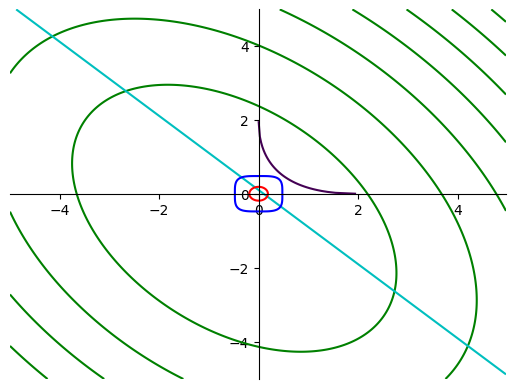

In [95]:
X1 = X1.reshape([len(X1), 1])
X2 = X2.reshape([len(X2), 1])
Y = Y.reshape([len(Y), 1])
w1_range = np.arange(-5.0, 5.0, delta)
w2_range = np.arange(-5.0, 5.0, delta)
w1, w2 = np.meshgrid(w1_range, w2_range)
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')

w1_sq_coeff = (X1.T @ X1)[0][0]
w2_sq_coeff = (X2.T @ X2)[0][0]
w1w2_coeff = (X1.T @ X2)[0][0]
w1_coeff = (X1.T @ Y)[0][0]
w2_coeff = (X2.T @ Y)[0][0]
const = (Y.T @ Y)[0][0]

cost_func = w1_sq_coeff * w1 * w1 + w2_sq_coeff * w2 * w2 + w1w2_coeff  *w1 * w2 + w1_coeff * w1 + w2_coeff * w2 + const

eqn = 1.4 - w1 ** 0.5 - w2 ** 0.5
eqn1 = 0.1 - w1 - w2
eqn2 = 0.035 - w1*w1 - w2*w2
eqn3 = 0.052 - w1*w1*w1*w1 - w2*w2*w2*w2

plt.contour(w1, w2, cost_func, colors = 'g')
plt.contour(w1, w2, eqn, [0])
plt.contour(w1, w2, eqn1, [0], colors = 'c')
plt.contour(w1, w2, eqn2, [0], colors = 'r')
plt.contour(w1, w2, eqn3, [0], colors = 'b')



plt.show()